In [1]:
import requests
from operator import itemgetter
from bilibili import BiliSpider

In [12]:
# 搜索近两周内按照视频热度和弹幕数前100的视频
# pagesize 每页数量 time_from 开始时间 time_to 结束时间
url = 'https://s.search.bilibili.com/cate/search?main_ver=v3&search_type=video&view_type=hot_rank&order=dm&copy_right=-1&cate_id=21&page=1&pagesize=100&jsonp=jsonp&time_from=20200613&time_to=20200627&_=1593218562408'
resp = requests.get(url)

In [14]:
# 将http请求拿到的数据json序列化
retData = resp.json()

In [19]:
import pandas as pd
# 视频数据里面主要包含bvid,author,tag等数据，存入pandas
df = pd.DataFrame.from_dict(retData['result'])

In [35]:
# 展示前5行数据
df.head()

,senddate,rank_offset,tag,duration,id,rank_score,badgepay,pubdate,author,review,...,arcrank,play,pic,description,video_review,is_pay,favorites,arcurl,bvid,title
0,1592735414,1,"VLOG,生活记录,生活,翔翔大作战,小翔哥,父亲节",642,838550068,67161,False,2020-06-21 17:43:22,拜托了小翔哥,52797,...,0,6049665,//i0.hdslb.com/bfs/archive/786dc5a10305c16ce4f...,大家好，我是小翔哥，未来在各个平台，我会通过@拜托了小翔哥 继续和大家分享好吃好玩好快乐的内...,67161,0,112995,http://www.bilibili.com/video/av838550068,BV1Wg4y1q7fk,小翔哥回来了，我们重新开始
1,1592192893,2,"VLOG人生分享会,VLOG,生活记录,歪果仁,美食,美食圈,米其林,吃播,探店",354,626074915,52426,False,2020-06-15 11:48:13,我是郭杰瑞,12093,...,0,3305732,//i0.hdslb.com/bfs/archive/e26809b470a79ea74df...,,52426,0,18202,http://www.bilibili.com/video/av626074915,BV1Mt4y197oQ,纽约最贵米其林餐厅因疫情卖盒饭！800美元一盒值不值？
2,1592451903,3,"地道美食大赏,生活记录,生活,华农兄弟,华农,美食,烤鸡,农村生活,烧烤,蜂蜜",873,753577740,43530,False,2020-06-18 11:45:02,华农兄弟,4602,...,0,1887600,//i0.hdslb.com/bfs/archive/b452fba1e02d39e1356...,华农兄弟：拉了一车蜂蜜回来，搞1瓶去兄弟家烤鸡，味道还可以哟,43530,0,5542,http://www.bilibili.com/video/av753577740,BV1kk4y1z7RD,华农兄弟：拉了一车蜂蜜回来，搞1瓶去兄弟家烤鸡，味道还可以哟
3,1592213142,4,"互动视频,占卜,塔罗牌,塔罗,神秘学,星座,测试,生活,运势,原创",721,753408022,41268,False,2020-06-15 17:25:42,会星座的兔子,5785,...,0,275563,//i0.hdslb.com/bfs/archive/93c5c923bf27089e8e7...,1，兔兔说：素质三连，好运连连\n2，凭你的第一直觉选择，请相信你的第一直觉\n3，评论：第...,41268,0,12910,http://www.bilibili.com/video/av753408022,BV1Qk4y1B7PB,【塔罗占卜】2020下半年你的改变&amp;方向？评论留言：顺顺利利√
4,1592648055,5,"VLOG人生分享会,女装,女装大佬,可爱的男孩子,萌妹子,可爱,搞笑,vlog,vlog生活...",475,926027033,41241,False,2020-06-20 17:58:25,在下哲别,5061,...,0,1723954,//i0.hdslb.com/bfs/archive/93ddf67c6bd71253a6b...,谁能帮我把点赞弄成单数！对了，喜欢我视频记得点个关注噢\n身体恢复了 谢谢朋友们的关心\n2...,41241,0,18873,http://www.bilibili.com/video/av926027033,BV1nT4y1J7Dj,最后一次女装，且珍惜


In [58]:
bvids = df['bvid']
dmList = list()
for bvid in bvids:
    index = bvids[bvids.values == bvid].index
    # print(df.loc[index]['bvid'])
    spider = BiliSpider(bvid, 'video')
    dmUrl = spider.getXml_url()
    dmXml = spider.parse_url(dmUrl)
    spider.write_file(dmXml)
    dmText = spider.parseXml()
    # print(dmText)
    dmList.append(dmText)

弹幕的编号是：204240323
弹幕的编号是：202198910
弹幕的编号是：202968581
弹幕的编号是：201182776
弹幕的编号是：203886822
弹幕的编号是：205943251
弹幕的编号是：204857167
弹幕的编号是：205204773
弹幕的编号是：202055930
弹幕的编号是：204521933
弹幕的编号是：203212458
弹幕的编号是：205118712
弹幕的编号是：203001058
弹幕的编号是：202950173
弹幕的编号是：203549297
弹幕的编号是：203716318
弹幕的编号是：204488464
弹幕的编号是：203272566
弹幕的编号是：202868991
弹幕的编号是：202881376
弹幕的编号是：205369039
弹幕的编号是：203381494
弹幕的编号是：203727112
弹幕的编号是：205361657
弹幕的编号是：203717150
弹幕的编号是：202539010
弹幕的编号是：205206351
弹幕的编号是：205998048
弹幕的编号是：204108111
弹幕的编号是：205338941
弹幕的编号是：204182831
弹幕的编号是：202233438
弹幕的编号是：205283577
弹幕的编号是：202837917
弹幕的编号是：204922005
弹幕的编号是：202019249
弹幕的编号是：204833170
弹幕的编号是：205317250
弹幕的编号是：203550375
弹幕的编号是：202565124
弹幕的编号是：205804855
弹幕的编号是：202070728
弹幕的编号是：203221753
弹幕的编号是：205066423
弹幕的编号是：202686741
弹幕的编号是：205452839
弹幕的编号是：201684215
弹幕的编号是：205372451
弹幕的编号是：205300324
弹幕的编号是：202713054
弹幕的编号是：204367162
弹幕的编号是：205412878
弹幕的编号是：204544496
弹幕的编号是：203619874
弹幕的编号是：204917593
弹幕的编号是：205266147
弹幕的编号是：202498250
弹幕的编号是：204799640
弹幕的编号是：2032286

In [61]:
# 获取到的弹幕信息存入表格
df['dmText'] = dmList

In [62]:
# 查看获取到的弹幕
df['dmText']

0     泪目泪目原账号已取关在哪里欢迎回家三岁蕾姆蕾姆蕾姆好久不见欢迎回来欢迎回来欢迎回来欢迎回来欢...
1     黛布拉·布莱克和莱昂·布莱克夫妇还要自己卷？？？？？？？？？？？？什么玩意？在中国你都能把餐...
2     呆头鹅一点人事不干阿做饭？鱼：你先吃他俩吧欧油，辣么重~菜虚坤：危？？？？？手里？霸占了村里...
3     第二组顺顺利利第二组顺顺利利第二组顺顺利利第二组顺顺利利第二组顺顺利利第二组顺顺利利第二组顺...
4     美女专业真的好看人才人才woc，竟然真的可以专业逐渐上头我靠好好看感觉好甜真的很像宋雨琦好好...
                            ...                        
95    木瓜大盗正 道 的 光苏东坡应该是在儋州中和镇吧吓着小孩了你安全帽呢罚款五十？？？有木瓜？？...
96    哈哈哈哈哈哈哈哈哈哈大幂幂喵酱老E！！啊啊啊啊啊啊啊啊啊啊啊敬汉卿不是去北京了吗爱了爱了幂幂...
97    呼呼哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈...
98    沙发我是第一个嘻嘻有人嘛哈哈哈来啦起飞来咧 来咧来了来了！来得太早没有弹幕我好怕热乎儿来了来...
99    涨零花钱有望啊啊啊啊啊啊不涨星星情商好高呀又来了这问题不能我也是学材料的！！！哈哈哈哈哈哈哈...
Name: dmText, Length: 100, dtype: object

In [63]:
df['tag']

0                            VLOG,生活记录,生活,翔翔大作战,小翔哥,父亲节
1              VLOG人生分享会,VLOG,生活记录,歪果仁,美食,美食圈,米其林,吃播,探店
2               地道美食大赏,生活记录,生活,华农兄弟,华农,美食,烤鸡,农村生活,烧烤,蜂蜜
3                     互动视频,占卜,塔罗牌,塔罗,神秘学,星座,测试,生活,运势,原创
4     VLOG人生分享会,女装,女装大佬,可爱的男孩子,萌妹子,可爱,搞笑,vlog,vlog生活...
                            ...                        
95                                   VLOG,生活记录,美食,农村,海南
96                                      BILIBILI 11周年演讲
97                  搞笑表演,VLOG,生活,高能,搞笑,整蛊,恶搞,充气娃娃,逗比,创意
98            全能打卡挑战,高能,恐怖,恐怖故事,灵异故事,都市传说,灵异,胆小勿入,可怕,猎奇
99                              夫夫,VLOG日常,恋爱日常,磕CP,生活记录
Name: tag, Length: 100, dtype: object

In [68]:
# 将tag中的文本拆分为单个词语存入tagDF
tagDF = pd.DataFrame({'name': []})
for item in df['tag']:
    tagDF = pd.concat([tagDF, pd.DataFrame({'name': item.split(',')})])

In [75]:
# 统计标签词频
tagCount = tagDF.loc[:, 'name'].value_counts()

In [80]:
type(tagCount)
tagCount

VLOG         45
生活           34
生活记录         30
VLOG人生分享会    25
搞笑           22
             ..
LOL           1
塔罗占卜          1
最强大脑          1
声控福利          1
吉原悠一          1
Name: name, Length: 378, dtype: int64

In [81]:
for index, value in tagCount.items():
    print(index, value)

VLOG 45
生活 34
生活记录 30
VLOG人生分享会 25
搞笑 22
吐槽 14
高能 12
美食 11
互动视频 11
自制 11
全能打卡挑战 9
学习 9
塔罗 8
搞笑视频 7
VLOG日常 7
沙雕日常 7
情感 6
占卜 6
记录 6
歪果仁 6
爱情 5
萌妹子 5
星座 5
恋爱 5
不要心动挑战赛 5
神秘学 5
情侣 5
日常 4
日语 4
东尼ookii 4
日本 4
沙雕 4
探店 4
青春有你2 4
地道美食大赏 3
挑战 3
塔罗牌 3
爆笑 3
旅游 3
校园 3
2020高考季 3
原创 3
感动 3
可爱 3
恶搞 3
农村 3
夫夫 3
美食圈 3
B站 2
机智的党妹 2
吃货 2
怪异君 2
罗翔 2
女神 2
不要心动挑战 2
2020我们毕业了！ 2
陈睿 2
房地产 2
健身 2
毕业季 2
高甜 2
女朋友 2
结婚 2
戴萌 2
鬼畜 2
黑历史 2
恐怖 2
vlog 2
布偶猫 2
运势 2
假日狂欢大作战 2
旅行 2
读评论 2
开箱 2
大学 2
开箱视频 2
整蛊 2
女装大佬 2
女友 2
海南 2
海鲜 2
力元君 2
美国 2
印度 2
不心动挑战 2
B站11周年 2
感人 2
正能量 2
BILIBILI 11周年演讲 2
测试 2
逗比 2
长隆 2
奇葩 2
社会 2
恋爱日常 2
美食教学 1
关于我的50个问题 1
毕业情侣不分开 1
不要笑挑战 1
剪辑 1
英雄联盟 1
魔鬼舅舅 1
亲情 1
淑怡 1
父亲节 1
华农 1
黑牌BFM洗面奶 1
毕业变美指南 1
复习 1
HIPHOP 1
无奖竞猜 1
哔哩哔哩 1
浙江大学 1
王一博 1
狗粮 1
Vlog 1
盗月社食遇记 1
赶海 1
米其林 1
斗鱼 1
事业 1
外国人说普通话 1
青春 1
上海 1
童年回忆 1
jk 1
bilibili 1
车祸 1
vlog生活 1
川建国 1
新冠肺炎 1
盗月社 1
老白 1
演讲 1
#B站11周年# 1
韩餐 1
考试 1
交通事故 1
拍摄 1
小伙 1
OldBa1 1
柠檬派咯 1
学业 1
蕾丝 1
明星 1
都市传说 1
综艺 1
李秋爽 1
求婚 1
李佳琦 1
采访 1
农村生活 1
室内设计 1
游戏 1
盲盒 1
刑侦 1
翔翔大作战 1


In [85]:
# 取出现频率最高的15个词语
tagTOP15 = tagCount[0:15]
tagTOP15

VLOG         45
生活           34
生活记录         30
VLOG人生分享会    25
搞笑           22
吐槽           14
高能           12
美食           11
互动视频         11
自制           11
全能打卡挑战        9
学习            9
塔罗            8
搞笑视频          7
VLOG日常        7
Name: name, dtype: int64

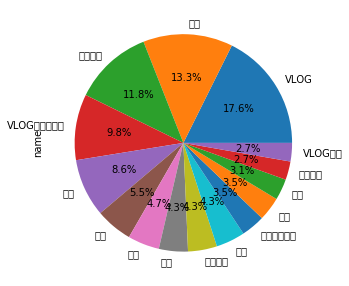

In [88]:
import matplotlib.pyplot as plt
# 占比图，中文显示有问题
plt.figure(figsize=(11, 5))
tagTOP15.plot.pie(labels=tagTOP15.index, autopct='%1.1f%%')